# Walking in Greater Mexico 

## Exploratory Analysis

### Import Libraries

In [73]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', None)

### 1. Prepare Data

##### 1.1 Load Data: person and housing level (CDMX and EDOMEX)

In [2]:
p_cdmx = pd.read_csv("Personas09.CSV")

In [3]:
p_edomex = pd.read_csv("Personas15.CSV")

In [4]:
vi_cdmx = pd.read_csv("Viviendas09.CSV")

In [5]:
vi_edomex = pd.read_csv("Viviendas15.CSV")

##### 1.2 Combine dataframes based on the **ID_VIV** column

In [6]:
dm_cdmx = pd.merge(p_cdmx,vi_cdmx,on = "ID_VIV")

In [7]:
dm_edomex = pd.merge(p_edomex,vi_edomex,on = "ID_VIV")

##### 1.3 Append dataframes cdmx and edomex

In [8]:
dm_zmvm = dm_cdmx.append(dm_edomex)

##### 1.4 Drop the rows from entities that don't belong to the Greater Mexico City

In [9]:
no_zmvm_edomex = dm_zmvm[(dm_zmvm['ENT_x'] == 15)]

In [10]:
mun_zmvm_noedomex = (1,3,4,5,6,7,8,12,14,18,19,21,26,27,32,40,41,42,43,45,47,48,49,51,52,54,55,56,62,63,64,66,67,71,72,73,74,76,77,78,79,80,82,85,86,87,88,90,97,98,101,102,105,106,107,110,111,113,114,115,116,117,118,119,123,124)

In [11]:
no_zmvm_edomex = no_zmvm_edomex[(no_zmvm_edomex['MUN_x']).isin (mun_zmvm_noedomex)]

In [12]:
no_zmvm_edomex

,ENT_x,MUN_x,LOC50K_x,ID_VIV,ID_PERSONA,COBERTURA_x,ESTRATO_x,UPM_x,FACTOR_x,CLAVIVP_x,...,ALIM_ADL1,ALIM_ADL2,ING_ALIM_ADL1,ING_ALIM_ADL2,ING_ALIM_ADL3,TIPOHOG,INGTRHOG,JEFE_SEXO,JEFE_EDAD,TAMLOC_y
0,15,1,0,150010000001,15001000000100001,2,15-001-0000-04,1,9,1,...,2,4,2,4,6,1,4085.0,3,50,2
1,15,1,0,150010000001,15001000000100002,2,15-001-0000-04,1,9,1,...,2,4,2,4,6,1,4085.0,3,50,2
2,15,1,0,150010000001,15001000000100003,2,15-001-0000-04,1,9,1,...,2,4,2,4,6,1,4085.0,3,50,2
3,15,1,0,150010000002,15001000000200001,2,15-001-0000-04,1,9,2,...,2,4,2,4,6,2,NaN,3,44,2
4,15,1,0,150010000002,15001000000200002,2,15-001-0000-04,1,9,2,...,2,4,2,4,6,2,NaN,3,44,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222362,15,124,0,151240002381,15124000238100002,2,15-124-0000-03,23,8,1,...,1,4,2,4,6,1,0.0,1,42,1
1222363,15,124,0,151240002381,15124000238100003,2,15-124-0000-03,23,8,1,...,1,4,2,4,6,1,0.0,1,42,1
1222364,15,124,0,151240002381,15124000238100004,2,15-124-0000-03,23,8,1,...,1,4,2,4,6,1,0.0,1,42,1
1222365,15,124,0,151240002381,15124000238100005,2,15-124-0000-03,23,8,1,...,1,4,2,4,6,1,0.0,1,42,1


In [14]:
zmvm = (dm_zmvm[~dm_zmvm.ID_PERSONA.isin(no_zmvm_edomex.ID_PERSONA)])

In [15]:
zmvm

,ENT_x,MUN_x,LOC50K_x,ID_VIV,ID_PERSONA,COBERTURA_x,ESTRATO_x,UPM_x,FACTOR_x,CLAVIVP_x,...,ALIM_ADL1,ALIM_ADL2,ING_ALIM_ADL1,ING_ALIM_ADL2,ING_ALIM_ADL3,TIPOHOG,INGTRHOG,JEFE_SEXO,JEFE_EDAD,TAMLOC_y
0,9,2,1,90020000001,9002000000100001,2,09-002-0001-00,1,27,1,...,2,4,2,4,6,2,58050.0,3,72,5
1,9,2,1,90020000001,9002000000100002,2,09-002-0001-00,1,27,1,...,2,4,2,4,6,2,58050.0,3,72,5
2,9,2,1,90020000001,9002000000100003,2,09-002-0001-00,1,27,1,...,2,4,2,4,6,2,58050.0,3,72,5
3,9,2,1,90020000001,9002000000100004,2,09-002-0001-00,1,27,1,...,2,4,2,4,6,2,58050.0,3,72,5
4,9,2,1,90020000001,9002000000100005,2,09-002-0001-00,1,27,1,...,2,4,2,4,6,2,58050.0,3,72,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228480,15,125,0,151250001671,15125000167100001,2,15-125-0000-10,1,1,1,...,2,4,2,4,6,1,6000.0,1,32,2
1228481,15,125,0,151250001671,15125000167100002,2,15-125-0000-10,1,1,1,...,2,4,2,4,6,1,6000.0,1,32,2
1228482,15,125,0,151250001671,15125000167100003,2,15-125-0000-10,1,1,1,...,2,4,2,4,6,1,6000.0,1,32,2
1228483,15,125,0,151250001671,15125000167100004,2,15-125-0000-10,1,1,1,...,2,4,2,4,6,1,6000.0,1,32,2


In [16]:
columns_todrop1 = ["ID_VIV","SERSALUD","DHSERSAL1","LOC50K_x","COBERTURA_x","ESTRATO_x","UPM_x","FACTOR_x","CLAVIVP_x","NUMPER","PARENTESCO","IDENT_MADRE","IDENT_PADRE","ENT_PAIS_NAC","NACIONALIDAD","AFRODES","REGIS_NAC","DHSERSAL2","RELIGION","DIS_BANARSE","DIS_HABLAR","DIS_MENTAL","CAU_HABLAR","CAU_MENTAL","HLENGUA","QDIALECT_INALI","HESPANOL","ELENGUA","PERTE_INDIGENA","NOMCAR_C","ALFABET","ENT_PAIS_RES_5A","MUN_RES_5A","MUN_RES_5A","CAUSA_MIG_V","SITUA_CONYUGAL","IDENT_PAREJA","HORTRA","ACTIVIDADES_C","HIJOS_NAC_VIVOS","HIJOS_FALLECIDOS","HIJOS_SOBREVIV","FECHA_NAC_M","FECHA_NAC_A","SOBREVIVENCIA","IDENT_HIJO","EDAD_MORIR_D","EDAD_MORIR_M","EDAD_MORIR_A","EDAD_MORIR_TD","TAMLOC_x","ENT_y","MUN_y","LOC50K_y","COBERTURA_y","ESTRATO_y","UPM_y","FACTOR_y","CLAVIVP_y","PAREDES","TECHOS","PISOS","COCINA","CUADORM","TOTCUART","LUG_COC","COMBUSTIBLE","ESTUFA","ELECTRICIDAD","FOCOS","FOCOS_AHORRA","AGUA_ENTUBADA","ABA_AGUA_ENTU","ABA_AGUA_NO_ENTU","ABA_AGUA_NO_ENTU","TINACO","CISTERNA","BOMBA_AGUA","REGADERA","BOILER","CALENTADOR_SOLAR","AIRE_ACON","PANEL_SOLAR","SERSAN","CONAGUA","USOEXC","DRENAJE","SEPARACION1","SEPARACION2","SEPARACION3","SEPARACION4","DESTINO_BAS","REFRIGERADOR","LAVADORA","HORNO","RADIO","TELEVISOR","COMPUTADORA","TELEFONO","CELULAR","INTERNET","SERV_TV_PAGA","SERV_PEL_PAGA","CON_VJUEGOS","TENENCIA","ESCRITURAS","FORMA_ADQUI","FINANCIAMIENTO1","FINANCIAMIENTO2","FINANCIAMIENTO3","DEUDA","NUMPERS","DUE1_NUM","DUE2_NUM","MCONMIG","MNUMPERS","INGR_PEROTROPAIS","INGR_PERDENTPAIS","INGR_AYUGOB","INGR_JUBPEN","ALIMENTACION","ALIM_ADL1","ALIM_ADL2","ING_ALIM_ADL1","ING_ALIM_ADL2","ING_ALIM_ADL3","TIPOHOG","TAMLOC_y"]

In [17]:
zmvm.drop(columns_todrop1, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
zmvm

,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,CAU_VER,...,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
0,9,2,9002000000100001,3,72,1,1,1,2,NaN,...,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
1,9,2,9002000000100002,1,77,1,1,3,1,NaN,...,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
2,9,2,9002000000100003,3,47,1,1,1,1,NaN,...,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
3,9,2,9002000000100004,3,40,3,1,1,1,1.0,...,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
4,9,2,9002000000100005,1,45,1,1,1,1,NaN,...,3.0,1.0,3.0,NaN,7.0,2.0,4.0,58050.0,3,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228480,15,125,15125000167100001,3,1,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32
1228481,15,125,15125000167100002,1,7,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32
1228482,15,125,15125000167100003,3,5,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32
1228483,15,125,15125000167100004,3,32,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,7.0,2.0,3.0,6000.0,1,32


##### 1.6 Convert dataset into CSV

In [19]:
zmvm.to_csv('zmvm.csv')

### 2. Exploratory/Cleaning Data Analysis

#### 1.- Data Profiling Report to make a quick exploratory data report.

##### For this first exploratory data we choose the minimal version. Otherwise it takes too long to execute. We will execute a second one, once our database is cleaned.

##### SCHOOL

In [20]:
zmvm_expl = pd.read_csv("zmvm.csv")

In [21]:
profile = ProfileReport(zmvm_expl, minimal=True)
profile.to_file(output_file="zmvm.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.- Split the databases between: those who conmute to the school, those who conmute to the work, those who conmute to both

In [22]:
zmvm_esc = zmvm_expl[(zmvm_expl.MED_TRASLADO_ESC1.notnull()) |(zmvm_expl.MED_TRASLADO_ESC2 == 1)|(zmvm_expl.MED_TRASLADO_ESC3 == 1)]

In [24]:
escuela = ProfileReport(zmvm_esc, minimal=True)
profile.to_file(output_file="escuela.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
col_esc_todrop = ["CAU_VER","CAU_OIR","CAU_CAMINAR","CAU_RECORDAR","CAU_BANARSE","MED_TRASLADO_TRAB3","MED_TRASLADO_TRAB2","MED_TRASLADO_TRAB1","TIE_TRASLADO_TRAB","ENT_PAIS_TRAB","MUN_TRAB","INGTRMEN","CREDITO_VIVIENDA","SAR_AFORE","INCAP_SUELDO","UTILIDADES","SERVICIO_MEDICO","VACACIONES","AGUINALDO","SITTRA","OCUPACION_C"]

In [26]:
zmvm_esc.drop(col_esc_todrop, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
zmvm_esc['MED_TRASLADO_ESC1'].isnull().sum()

0

In [29]:
zmvm_esc['MED_TRASLADO_ESC3'].isnull().sum()

238899

In [30]:
zmvm_esc['MED_TRASLADO_ESC2'] = zmvm_esc['MED_TRASLADO_ESC2'].replace(np.nan, 0)

<ipython-input-30-fd241088552e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['MED_TRASLADO_ESC2'] = zmvm_esc['MED_TRASLADO_ESC2'].replace(np.nan, 0)


In [31]:
zmvm_esc['MED_TRASLADO_ESC2'].isnull().sum()

0

In [32]:
zmvm_esc['MED_TRASLADO_ESC3'] = zmvm_esc['MED_TRASLADO_ESC3'].replace(np.nan, 0)

<ipython-input-32-ca7b466fb6a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['MED_TRASLADO_ESC3'] = zmvm_esc['MED_TRASLADO_ESC3'].replace(np.nan, 0)


In [33]:
zmvm_esc['MED_TRASLADO_ESC3'].isnull().sum()

0

In [34]:
zmvm_esc['CONACT'].isnull().sum()

110277

In [35]:
zmvm_esc.drop('CONACT', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
zmvm_esc

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,15125000166600003,3,6,1,1,1,1,...,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61
962372,1228475,15,125,15125000166900004,3,13,1,1,1,1,...,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42
962374,1228477,15,125,15125000167000002,1,4,1,1,1,1,...,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47
962378,1228481,15,125,15125000167100002,1,7,1,1,1,1,...,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32


In [37]:
zmvm_esc.fillna(0)

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,15125000166600003,3,6,1,1,1,1,...,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61
962372,1228475,15,125,15125000166900004,3,13,1,1,1,1,...,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42
962374,1228477,15,125,15125000167000002,1,4,1,1,1,1,...,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47
962378,1228481,15,125,15125000167100002,1,7,1,1,1,1,...,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32


In [38]:
zmvm_esc['MED_TRASLADO_ESC1'].unique()

array([ 1.,  2.,  6.,  5.,  3., 11.,  8.,  4.,  7., 12., 10.,  9., 99.])

In [39]:
print (zmvm_esc.loc[zmvm_esc['MED_TRASLADO_ESC1'] == 99])

        Unnamed: 0  ENT_x  MUN_x         ID_PERSONA  SEXO  EDAD  DIS_VER  \
26360        26360      9      3   9003000269200003     3    27        1   
42529        42529      9      4   9004000213200001     1    14        2   
70394        70394      9      6   9006000122600002     3    21        1   
83315        83315      9      6   9006000484900003     1    36        1   
100819      100819      9      7   9007000416200005     1    23        1   
...            ...    ...    ...                ...   ...   ...      ...   
957910     1224013     15    125  15125000037200001     1    21        1   
957945     1224048     15    125  15125000038200001     1    20        1   
958992     1225095     15    125  15125000066000003     1    16        1   
959917     1226020     15    125  15125000088600001     1    27        1   
960133     1226236     15    125  15125000094000004     1    18        1   

        DIS_OIR  DIS_CAMINAR  DIS_RECORDAR  ...  MED_TRASLADO_ESC3  NIVACAD  \
26360   

In [40]:
zmvm_esc = zmvm_esc[zmvm_esc.MED_TRASLADO_ESC1 != 99]

In [41]:
zmvm_esc['MED_TRASLADO_ESC3'].unique()

array([ 0.,  6.,  9.,  5., 11., 12., 10.,  8.,  4.,  7.,  3.])

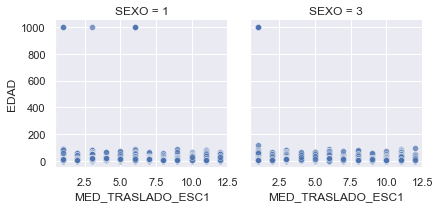

In [42]:
g = sns.FacetGrid(zmvm_esc, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_ESC1", "EDAD", alpha=.7)
g.add_legend()

In [43]:
zmvm_esc['EDAD'].unique()

array([ 14,  21,  24,  22,  10,   9,  17,  20,   7,  15,  16,   4,   8,
        11,  23,  27,  29,  12,  19,  18,  13,   6,  30,  26,  28,   5,
        25,  36,  46,  31,  49,  48,  53,  52,  35,  51,  43,   3,  42,
        34,  45,  38,  39, 999,  68,  47,  33,  32,  57,  56,  40,  64,
        65,  37,  55,  44,  69,  71,  59,  66,  60,  41,  80,  61,  50,
        72,  70,  63,  62,  54,  58,  79,  74,  73,  76,  90,  67,  88,
        83,  91,  78,  85,  82,  87,  75,  81,  77,  84, 122,  89,  94])

In [44]:
zmvm_esc = zmvm_esc[zmvm_esc.EDAD != 999]

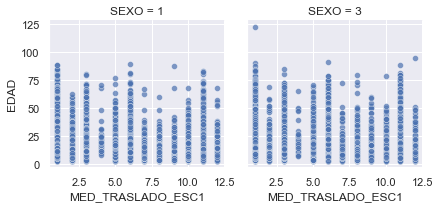

In [45]:
g = sns.FacetGrid(zmvm_esc, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_ESC1", "EDAD", alpha=.7)
g.add_legend()

In [46]:
zmvm_esc.dtypes

Unnamed: 0             int64
ENT_x                  int64
MUN_x                  int64
ID_PERSONA             int64
SEXO                   int64
EDAD                   int64
DIS_VER                int64
DIS_OIR                int64
DIS_CAMINAR            int64
DIS_RECORDAR           int64
ASISTEN              float64
MUN_ASI              float64
ENT_PAIS_ASI         float64
TIE_TRASLADO_ESCU    float64
MED_TRASLADO_ESC1    float64
MED_TRASLADO_ESC2    float64
MED_TRASLADO_ESC3    float64
NIVACAD              float64
ESCOLARI             float64
ESCOACUM             float64
AUTOPROP             float64
MOTOCICLETA          float64
BICICLETA            float64
INGTRHOG             float64
JEFE_SEXO              int64
JEFE_EDAD              int64
dtype: object

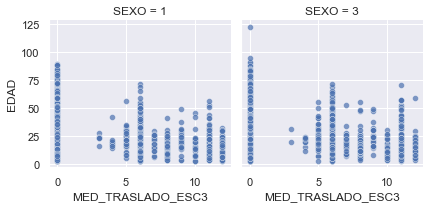

In [47]:
g = sns.FacetGrid(zmvm_esc, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_ESC3", "EDAD", alpha=.7)
g.add_legend()

In [48]:
print (zmvm_esc.loc[zmvm_esc['EDAD'] == 122])

        Unnamed: 0  ENT_x  MUN_x         ID_PERSONA  SEXO  EDAD  DIS_VER  \
409399      227606     15     25  15025000515200002     3   122        1   

        DIS_OIR  DIS_CAMINAR  DIS_RECORDAR  ...  MED_TRASLADO_ESC3  NIVACAD  \
409399        1            1             1  ...                0.0      2.0   

        ESCOLARI  ESCOACUM  AUTOPROP  MOTOCICLETA  BICICLETA  INGTRHOG  \
409399       6.0       6.0       7.0          1.0        3.0    6000.0   

        JEFE_SEXO  JEFE_EDAD  
409399          1         54  

[1 rows x 26 columns]


array([[<AxesSubplot:title={'center':'TIE_TRASLADO_ESCU'}>]], dtype=object)

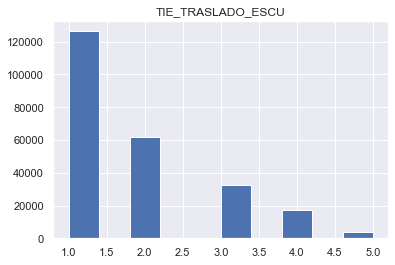

In [49]:
zmvm_esc.hist('TIE_TRASLADO_ESCU') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_ESC1'}>]], dtype=object)

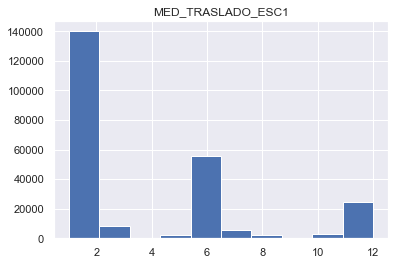

In [50]:
zmvm_esc.hist('MED_TRASLADO_ESC1') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_ESC2'}>]], dtype=object)

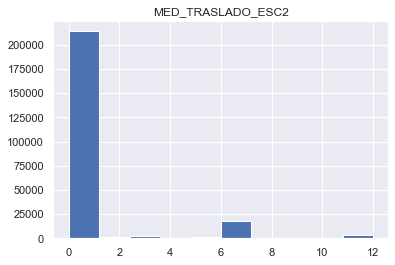

In [51]:
zmvm_esc.hist('MED_TRASLADO_ESC2') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_ESC3'}>]], dtype=object)

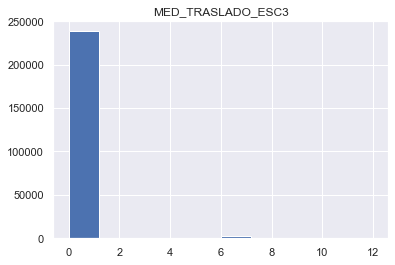

In [52]:
zmvm_esc.hist('MED_TRASLADO_ESC3') 

In [53]:
zmvm_esc.columns

Index(['Unnamed: 0', 'ENT_x', 'MUN_x', 'ID_PERSONA', 'SEXO', 'EDAD', 'DIS_VER',
       'DIS_OIR', 'DIS_CAMINAR', 'DIS_RECORDAR', 'ASISTEN', 'MUN_ASI',
       'ENT_PAIS_ASI', 'TIE_TRASLADO_ESCU', 'MED_TRASLADO_ESC1',
       'MED_TRASLADO_ESC2', 'MED_TRASLADO_ESC3', 'NIVACAD', 'ESCOLARI',
       'ESCOACUM', 'AUTOPROP', 'MOTOCICLETA', 'BICICLETA', 'INGTRHOG',
       'JEFE_SEXO', 'JEFE_EDAD'],
      dtype='object')

In [55]:
zmvm_esc['CAMINA_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 1) | (zmvm_esc['MED_TRASLADO_ESC2']== 1) |(zmvm_esc['MED_TRASLADO_ESC3']== 1) , True, False)
zmvm_esc.head()

<ipython-input-55-c34789568fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['CAMINA_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 1) | (zmvm_esc['MED_TRASLADO_ESC2']== 1) |(zmvm_esc['MED_TRASLADO_ESC3']== 1) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True


In [56]:
zmvm_esc['BICYCLE_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 2) | (zmvm_esc['MED_TRASLADO_ESC2']== 2) |(zmvm_esc['MED_TRASLADO_ESC3']== 2) , True, False)
zmvm_esc.head()

<ipython-input-56-fb77617c0126>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['BICYCLE_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 2) | (zmvm_esc['MED_TRASLADO_ESC2']== 2) |(zmvm_esc['MED_TRASLADO_ESC3']== 2) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False


In [57]:
zmvm_esc['SUBWAY_LR_CR_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 3) | (zmvm_esc['MED_TRASLADO_ESC2']== 3) |(zmvm_esc['MED_TRASLADO_ESC3']== 3) , True, False)
zmvm_esc.head()

<ipython-input-57-d4c6c29ea9ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['SUBWAY_LR_CR_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 3) | (zmvm_esc['MED_TRASLADO_ESC2']== 3) |(zmvm_esc['MED_TRASLADO_ESC3']== 3) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False


In [58]:
zmvm_esc['TRAMWAY_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 4) | (zmvm_esc['MED_TRASLADO_ESC2']== 4) |(zmvm_esc['MED_TRASLADO_ESC3']== 4) , True, False)
zmvm_esc.head()

<ipython-input-58-f1fd93425986>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['TRAMWAY_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 4) | (zmvm_esc['MED_TRASLADO_ESC2']== 4) |(zmvm_esc['MED_TRASLADO_ESC3']== 4) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,7.0,2.0,4.0,58050.0,3,72,True,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,7.0,2.0,4.0,58050.0,3,72,True,False,True,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,7.0,2.0,3.0,80500.0,1,57,False,True,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,7.0,2.0,3.0,80500.0,1,57,True,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,8.0,2.0,4.0,0.0,3,56,True,False,False,False


In [59]:
zmvm_esc['METROBUS_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 5) | (zmvm_esc['MED_TRASLADO_ESC2']== 5) |(zmvm_esc['MED_TRASLADO_ESC3']== 5) , True, False)
zmvm_esc.head()

<ipython-input-59-7f689fa73ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['METROBUS_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 5) | (zmvm_esc['MED_TRASLADO_ESC2']== 5) |(zmvm_esc['MED_TRASLADO_ESC3']== 5) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,2.0,4.0,58050.0,3,72,True,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,2.0,4.0,58050.0,3,72,True,False,True,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,2.0,3.0,80500.0,1,57,False,True,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,2.0,3.0,80500.0,1,57,True,False,False,False,True
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,2.0,4.0,0.0,3,56,True,False,False,False,False


In [60]:
zmvm_esc['BUS_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 6) | (zmvm_esc['MED_TRASLADO_ESC2']== 6) |(zmvm_esc['MED_TRASLADO_ESC3']== 6) , True, False)
zmvm_esc.head()

<ipython-input-60-9b6e293e6f52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['BUS_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 6) | (zmvm_esc['MED_TRASLADO_ESC2']== 6) |(zmvm_esc['MED_TRASLADO_ESC3']== 6) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,4.0,58050.0,3,72,True,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,4.0,58050.0,3,72,True,False,True,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,3.0,80500.0,1,57,False,True,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,3.0,80500.0,1,57,True,False,False,False,True,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,4.0,0.0,3,56,True,False,False,False,False,False


In [61]:
zmvm_esc['SCHOOL_TRANSPORTATION_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 7) | (zmvm_esc['MED_TRASLADO_ESC2']== 7) |(zmvm_esc['MED_TRASLADO_ESC3']== 7) , True, False)
zmvm_esc.head()

<ipython-input-61-f749cc7117e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['SCHOOL_TRANSPORTATION_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 7) | (zmvm_esc['MED_TRASLADO_ESC2']== 7) |(zmvm_esc['MED_TRASLADO_ESC3']== 7) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,58050.0,3,72,True,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,58050.0,3,72,True,False,True,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,80500.0,1,57,False,True,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,80500.0,1,57,True,False,False,False,True,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,0.0,3,56,True,False,False,False,False,False,False


In [62]:
zmvm_esc['TAXI_NOAPP_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 8) | (zmvm_esc['MED_TRASLADO_ESC2']== 8) |(zmvm_esc['MED_TRASLADO_ESC3']== 8) , True, False)
zmvm_esc.head()

<ipython-input-62-fc9011325bf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['TAXI_NOAPP_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 8) | (zmvm_esc['MED_TRASLADO_ESC2']== 8) |(zmvm_esc['MED_TRASLADO_ESC3']== 8) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,3,72,True,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,3,72,True,False,True,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,1,57,False,True,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,1,57,True,False,False,False,True,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,3,56,True,False,False,False,False,False,False,False


In [63]:
zmvm_esc['TAXI_APP_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 9) | (zmvm_esc['MED_TRASLADO_ESC2']== 9) |(zmvm_esc['MED_TRASLADO_ESC3']== 9) , True, False)
zmvm_esc.head()

<ipython-input-63-bb58034f503b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['TAXI_APP_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 9) | (zmvm_esc['MED_TRASLADO_ESC2']== 9) |(zmvm_esc['MED_TRASLADO_ESC3']== 9) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,72,True,False,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,72,True,False,True,False,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,57,False,True,False,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,57,True,False,False,False,True,False,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,56,True,False,False,False,False,False,False,False,False


In [64]:
zmvm_esc['MOTO_SCOOTER_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 10) | (zmvm_esc['MED_TRASLADO_ESC2']== 10) |(zmvm_esc['MED_TRASLADO_ESC3']== 10) , True, False)
zmvm_esc.head()

<ipython-input-64-6315c1cbccd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['MOTO_SCOOTER_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 10) | (zmvm_esc['MED_TRASLADO_ESC2']== 10) |(zmvm_esc['MED_TRASLADO_ESC3']== 10) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,True,False,False,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,True,False,True,False,False,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,False,True,False,False,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,True,False,False,False,True,False,False,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,True,False,False,False,False,False,False,False,False,False


In [65]:
zmvm_esc['CAR_VAN_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 11) | (zmvm_esc['MED_TRASLADO_ESC2']== 11) |(zmvm_esc['MED_TRASLADO_ESC3']== 11) , True, False)
zmvm_esc.head()

<ipython-input-65-c98789c46ec6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['CAR_VAN_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 11) | (zmvm_esc['MED_TRASLADO_ESC2']== 11) |(zmvm_esc['MED_TRASLADO_ESC3']== 11) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,False,True,False,False,False,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,True,False,False,False,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,False,False,False,True,False,False,False,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False


In [66]:
zmvm_esc['OTHER_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 12) | (zmvm_esc['MED_TRASLADO_ESC2']== 12) |(zmvm_esc['MED_TRASLADO_ESC3']== 12) , True, False)
zmvm_esc.head()

<ipython-input-66-87924a17c1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['OTHER_ESC'] = np.where((zmvm_esc['MED_TRASLADO_ESC1']== 12) | (zmvm_esc['MED_TRASLADO_ESC2']== 12) |(zmvm_esc['MED_TRASLADO_ESC3']== 12) , True, False)


,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC,OTHER_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,True,False,False,False,False,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False


In [67]:
zmvm_esc

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,...,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC,OTHER_ESC
6,6,9,2,9002000000100007,3,14,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
7,7,9,2,9002000000100008,1,21,1,1,1,1,...,True,False,False,False,False,False,False,False,False,False
9,9,9,2,9002000000200002,1,24,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
10,10,9,2,9002000000200003,3,22,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
18,18,9,2,9002000000400001,1,10,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,15125000166600003,3,6,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False
962372,1228475,15,125,15125000166900004,3,13,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False
962374,1228477,15,125,15125000167000002,1,4,1,1,1,1,...,False,False,False,False,False,True,False,False,False,False
962378,1228481,15,125,15125000167100002,1,7,1,1,1,1,...,False,False,False,False,False,False,False,False,True,False


In [126]:
def count_number_of_transport_means_school(row):
    number_of_transport_means = 0
    if row['MED_TRASLADO_ESC1'] > 0:
        number_of_transport_means += 1
    if row['MED_TRASLADO_ESC2'] > 0:
        number_of_transport_means += 1
    if row['MED_TRASLADO_ESC3'] > 0:
        number_of_transport_means += 1
    return number_of_transport_means

In [69]:
zmvm_esc['number_of_transport_means'] = zmvm_esc.apply(count_number_of_transport_means, axis=1)

<ipython-input-69-a618719c4bfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_esc['number_of_transport_means'] = zmvm_esc.apply(count_number_of_transport_means, axis=1)


In [70]:
zmvm_esc['number_of_transport_means'].value_counts()

1    213959
2     24488
3      3705
Name: number_of_transport_means, dtype: int64

In [74]:
zmvm_esc

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_ESC,BICYCLE_ESC,SUBWAY_LR_CR_ESC,TRAMWAY_ESC,METROBUS_ESC,BUS_ESC,SCHOOL_TRANSPORTATION_ESC,TAXI_NOAPP_ESC,TAXI_APP_ESC,MOTO_SCOOTER_ESC,CAR_VAN_ESC,OTHER_ESC,number_of_transport_means
6,6,9,2,9002000000100007,3,14,1,1,1,1,1.0,999.0,15.0,1.0,1.0,0.0,0.0,3.0,2.0,8.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False,1
7,7,9,2,9002000000100008,1,21,1,1,1,1,1.0,16.0,9.0,3.0,1.0,3.0,0.0,11.0,1.0,13.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False,False,2
9,9,9,2,9002000000200002,1,24,1,1,1,1,1.0,104.0,15.0,1.0,2.0,0.0,0.0,11.0,4.0,16.0,7.0,2.0,3.0,80500.0,1,57,False,True,False,False,False,False,False,False,False,False,False,False,1
10,10,9,2,9002000000200003,3,22,1,1,1,1,1.0,5.0,9.0,3.0,1.0,5.0,0.0,11.0,2.0,14.0,7.0,2.0,3.0,80500.0,1,57,True,False,False,False,True,False,False,False,False,False,False,False,2
18,18,9,2,9002000000400001,1,10,1,1,1,1,1.0,2.0,9.0,1.0,1.0,0.0,0.0,2.0,3.0,3.0,8.0,2.0,4.0,0.0,3,56,True,False,False,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962360,1228463,15,125,15125000166600003,3,6,1,1,1,1,1.0,81.0,15.0,1.0,11.0,0.0,0.0,1.0,2.0,0.0,7.0,2.0,3.0,0.0,1,61,False,False,False,False,False,False,False,False,False,False,True,False,1
962372,1228475,15,125,15125000166900004,3,13,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,3.0,1.0,7.0,7.0,2.0,4.0,20000.0,1,42,False,False,False,False,False,False,False,False,False,False,True,False,1
962374,1228477,15,125,15125000167000002,1,4,1,1,1,1,1.0,59.0,15.0,1.0,8.0,0.0,0.0,1.0,1.0,0.0,7.0,2.0,4.0,13740.0,3,47,False,False,False,False,False,False,False,True,False,False,False,False,1
962378,1228481,15,125,15125000167100002,1,7,1,1,1,1,1.0,59.0,15.0,1.0,11.0,0.0,0.0,2.0,1.0,1.0,7.0,2.0,3.0,6000.0,1,32,False,False,False,False,False,False,False,False,False,False,True,False,1


In [75]:
zmvm_esc.to_csv('zmvm_esc.csv')

In [76]:
zmvm_work = zmvm_expl[(zmvm_expl.MED_TRASLADO_TRAB1.notnull()) |(zmvm_expl.MED_TRASLADO_TRAB2 == 1)|(zmvm_expl.MED_TRASLADO_TRAB3 == 1)]

In [77]:
zmvm_work

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,CAU_VER,CAU_OIR,CAU_CAMINAR,CAU_RECORDAR,CAU_BANARSE,ASISTEN,MUN_ASI,ENT_PAIS_ASI,TIE_TRASLADO_ESCU,MED_TRASLADO_ESC1,MED_TRASLADO_ESC2,MED_TRASLADO_ESC3,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
0,0,9,2,9002000000100001,3,72,1,1,1,2,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
1,1,9,2,9002000000100002,1,77,1,1,3,1,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
2,2,9,2,9002000000100003,3,47,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
3,3,9,2,9002000000100004,3,40,3,1,1,1,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
4,4,9,2,9002000000100005,1,45,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,NaN,7.0,2.0,4.0,58050.0,3,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962367,1228470,15,125,15125000166800003,3,43,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,3.0,15.0,10.0,239.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,10000.0,109.0,15.0,3.0,11.0,NaN,NaN,7.0,1.0,3.0,20860.0,1,44
962368,1228471,15,125,15125000166800004,1,44,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,4.0,16.0,10.0,239.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,10000.0,109.0,15.0,3.0,11.0,NaN,NaN,7.0,1.0,3.0,20860.0,1,44
962370,1228473,15,125,15125000166900002,1,42,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,4.0,16.0,10.0,227.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,20000.0,3.0,9.0,4.0,10.0,NaN,NaN,7.0,2.0,4.0,20000.0,1,42
962373,1228476,15,125,15125000167000001,1,24,1,1,1,1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,12.0,10.0,263.0,1.0,1.0,4.0,5.0,7.0,1.0,3.0,5.0,6450.0,109.0,15.0,3.0,6.0,NaN,NaN,7.0,2.0,4.0,13740.0,3,47


In [78]:
trabajo = ProfileReport(zmvm_work, minimal=True)
profile.to_file(output_file="work.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
col_work_todrop = ["CAU_VER","CAU_OIR","CAU_CAMINAR","CAU_RECORDAR","CAU_BANARSE","MED_TRASLADO_ESC3","MED_TRASLADO_ESC2","MED_TRASLADO_ESC1","TIE_TRASLADO_ESCU","ENT_PAIS_ASI","MUN_ASI"]

In [81]:
zmvm_work.drop(col_work_todrop, axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
zmvm_work

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,NaN,NaN,7.0,2.0,4.0,58050.0,3,72
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,NaN,7.0,2.0,4.0,58050.0,3,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962367,1228470,15,125,15125000166800003,3,43,1,1,1,1,3.0,11.0,3.0,15.0,10.0,239.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,10000.0,109.0,15.0,3.0,11.0,NaN,NaN,7.0,1.0,3.0,20860.0,1,44
962368,1228471,15,125,15125000166800004,1,44,1,1,1,1,3.0,11.0,4.0,16.0,10.0,239.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,10000.0,109.0,15.0,3.0,11.0,NaN,NaN,7.0,1.0,3.0,20860.0,1,44
962370,1228473,15,125,15125000166900002,1,42,1,1,1,1,3.0,10.0,4.0,16.0,10.0,227.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,20000.0,3.0,9.0,4.0,10.0,NaN,NaN,7.0,2.0,4.0,20000.0,1,42
962373,1228476,15,125,15125000167000001,1,24,1,1,1,1,3.0,4.0,3.0,12.0,10.0,263.0,1.0,1.0,4.0,5.0,7.0,1.0,3.0,5.0,6450.0,109.0,15.0,3.0,6.0,NaN,NaN,7.0,2.0,4.0,13740.0,3,47


In [84]:
zmvm_work['MED_TRASLADO_TRAB1'].isnull().sum()

0

In [85]:
zmvm_work['MED_TRASLADO_TRAB2'].isnull().sum()

300862

In [87]:
zmvm_work['MED_TRASLADO_TRAB2'] = zmvm_work['MED_TRASLADO_TRAB2'].replace(np.nan, 0)

<ipython-input-87-21718c9ffad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_work['MED_TRASLADO_TRAB2'] = zmvm_work['MED_TRASLADO_TRAB2'].replace(np.nan, 0)


In [88]:
zmvm_work['MED_TRASLADO_TRAB2'].isnull().sum()

0

In [86]:
zmvm_work['MED_TRASLADO_TRAB3'].isnull().sum()

359688

In [89]:
zmvm_work['MED_TRASLADO_TRAB3'] = zmvm_work['MED_TRASLADO_TRAB3'].replace(np.nan, 0)

<ipython-input-89-3a9bf2be9166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zmvm_work['MED_TRASLADO_TRAB3'] = zmvm_work['MED_TRASLADO_TRAB3'].replace(np.nan, 0)


In [90]:
zmvm_work['MED_TRASLADO_TRAB3'].isnull().sum()

0

In [92]:
zmvm_work['OCUPACION_C'].isnull().sum()

0

In [95]:
zmvm_work.fillna(0)

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962367,1228470,15,125,15125000166800003,3,43,1,1,1,1,3.0,11.0,3.0,15.0,10.0,239.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,10000.0,109.0,15.0,3.0,11.0,0.0,0.0,7.0,1.0,3.0,20860.0,1,44
962368,1228471,15,125,15125000166800004,1,44,1,1,1,1,3.0,11.0,4.0,16.0,10.0,239.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,10000.0,109.0,15.0,3.0,11.0,0.0,0.0,7.0,1.0,3.0,20860.0,1,44
962370,1228473,15,125,15125000166900002,1,42,1,1,1,1,3.0,10.0,4.0,16.0,10.0,227.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,20000.0,3.0,9.0,4.0,10.0,0.0,0.0,7.0,2.0,4.0,20000.0,1,42
962373,1228476,15,125,15125000167000001,1,24,1,1,1,1,3.0,4.0,3.0,12.0,10.0,263.0,1.0,1.0,4.0,5.0,7.0,1.0,3.0,5.0,6450.0,109.0,15.0,3.0,6.0,0.0,0.0,7.0,2.0,4.0,13740.0,3,47


In [96]:
zmvm_work['MED_TRASLADO_TRAB1'].unique()

array([ 1., 11.,  8.,  6., 10.,  3.,  4.,  5.,  2.,  9., 12.,  7., 99.])

In [98]:
print (zmvm_work.loc[zmvm_work['MED_TRASLADO_TRAB1'] == 99])

        Unnamed: 0  ENT_x  MUN_x         ID_PERSONA  SEXO  EDAD  DIS_VER  \
9337          9337      9      2   9002000272900001     1    26        1   
20318        20318      9      3   9003000097000004     3    38        1   
26233        26233      9      3   9003000266200001     3    47        1   
26236        26236      9      3   9003000266200004     1    52        1   
26847        26847      9      3   9003000283900001     1    58        1   
...            ...    ...    ...                ...   ...   ...      ...   
959667     1225770     15    125  15125000081800005     1    23        1   
959890     1225993     15    125  15125000088000003     1    24        1   
959917     1226020     15    125  15125000088600001     1    27        1   
960109     1226212     15    125  15125000093500002     1    22        1   
960584     1226687     15    125  15125000107200001     1    34        1   

        DIS_OIR  DIS_CAMINAR  DIS_RECORDAR  ASISTEN  NIVACAD  ESCOLARI  \
9337         

In [99]:
zmvm_work = zmvm_work[zmvm_work.MED_TRASLADO_TRAB1 != 99]

In [102]:
zmvm_work['MED_TRASLADO_TRAB1'].unique()

array([ 1., 11.,  8.,  6., 10.,  3.,  4.,  5.,  2.,  9., 12.,  7.])

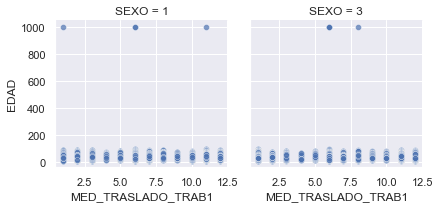

In [103]:
g = sns.FacetGrid(zmvm_work, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_TRAB1", "EDAD", alpha=.7)
g.add_legend()

In [105]:
zmvm_work['EDAD'].unique()

array([ 72,  77,  47,  40,  45,  39,  21,  55,  24,  22,  29,  57,  48,
        50,  54,  51,  46,  59,  19,  36,  60,  32,  25,  44,  27,  58,
        23,  56,  62,  37,  38,  65,  30,  33,  69,  52,  53,  42,  43,
        68,  41,  31,  34,  63,  20,  18,  49,  28,  70,  76,  35,  73,
        64,  15,  71,  61,  26,  74,  67,  17,  75,  66,  82,  83,  79,
        86,  81,  16,  84,  13,  92,  78,  90,  87,  80,  85,  14,  12,
        88,  94,  89,  93,  91, 101, 999,  96,  97,  98,  95])

In [106]:
zmvm_work = zmvm_work[zmvm_work.EDAD != 999]

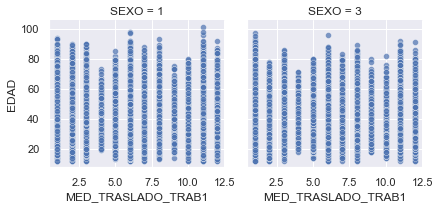

In [107]:
g = sns.FacetGrid(zmvm_work, col="SEXO")
g.map(sns.scatterplot, "MED_TRASLADO_TRAB1", "EDAD", alpha=.7)
g.add_legend()

In [108]:
zmvm_work.dtypes

Unnamed: 0              int64
ENT_x                   int64
MUN_x                   int64
ID_PERSONA              int64
SEXO                    int64
EDAD                    int64
DIS_VER                 int64
DIS_OIR                 int64
DIS_CAMINAR             int64
DIS_RECORDAR            int64
ASISTEN               float64
NIVACAD               float64
ESCOLARI              float64
ESCOACUM              float64
CONACT                float64
OCUPACION_C           float64
SITTRA                float64
AGUINALDO             float64
VACACIONES            float64
SERVICIO_MEDICO       float64
UTILIDADES            float64
INCAP_SUELDO          float64
SAR_AFORE             float64
CREDITO_VIVIENDA      float64
INGTRMEN              float64
MUN_TRAB              float64
ENT_PAIS_TRAB         float64
TIE_TRASLADO_TRAB     float64
MED_TRASLADO_TRAB1    float64
MED_TRASLADO_TRAB2    float64
MED_TRASLADO_TRAB3    float64
AUTOPROP              float64
MOTOCICLETA           float64
BICICLETA 

array([[<AxesSubplot:title={'center':'TIE_TRASLADO_TRAB'}>]], dtype=object)

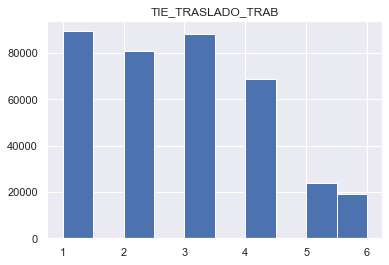

In [109]:
zmvm_work.hist('TIE_TRASLADO_TRAB') 

array([[<AxesSubplot:title={'center':'MED_TRASLADO_TRAB1'}>]],
      dtype=object)

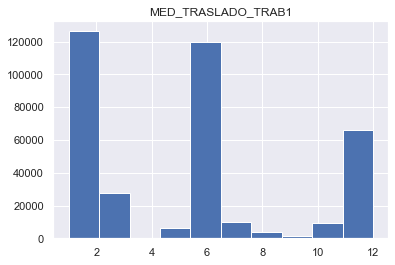

In [110]:
zmvm_work.hist('MED_TRASLADO_TRAB1') 

In [111]:
zmvm_work2 = zmvm_work.copy()

In [113]:
zmvm_work2['CAMINA_TRAB'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 1) | (zmvm_work2['MED_TRASLADO_TRAB2']== 1) |(zmvm_work2['MED_TRASLADO_TRAB3']== 1) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True


In [114]:
zmvm_work2['BICYCLE_TRAB'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 2) | (zmvm_work2['MED_TRASLADO_TRAB2']== 2) |(zmvm_work2['MED_TRASLADO_TRAB3']== 2) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False


In [116]:
zmvm_work2['SUBWAY_LR_CR_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 3) | (zmvm_work2['MED_TRASLADO_TRAB2']== 3) |(zmvm_work2['MED_TRASLADO_TRAB3']== 3) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True


In [117]:
zmvm_work2['TRAMWAY_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 4) | (zmvm_work2['MED_TRASLADO_TRAB2']== 4) |(zmvm_work2['MED_TRASLADO_TRAB3']== 4) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False


In [118]:
zmvm_work2['METROBUS_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 5) | (zmvm_work2['MED_TRASLADO_TRAB2']== 5) |(zmvm_work2['MED_TRASLADO_TRAB3']== 5) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False


In [119]:
zmvm_work2['BUS_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 6) | (zmvm_work2['MED_TRASLADO_TRAB2']== 6) |(zmvm_work2['MED_TRASLADO_TRAB3']== 6) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False


In [120]:
zmvm_work2['BUS_ENTREPRISE_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 7) | (zmvm_work2['MED_TRASLADO_TRAB2']== 7) |(zmvm_work2['MED_TRASLADO_TRAB3']== 7) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False


In [121]:
zmvm_work2['TAXI_NOAPP_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 8) | (zmvm_work2['MED_TRASLADO_TRAB2']== 8) |(zmvm_work2['MED_TRASLADO_TRAB3']== 8) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK,TAXI_NOAPP_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False


In [122]:
zmvm_work2['TAXI_APP_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 9) | (zmvm_work2['MED_TRASLADO_TRAB2']== 9) |(zmvm_work2['MED_TRASLADO_TRAB3']== 9) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK,TAXI_NOAPP_WORK,TAXI_APP_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False


In [123]:
zmvm_work2['MOTO_SCOOTER_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 10) | (zmvm_work2['MED_TRASLADO_TRAB2']== 10) |(zmvm_work2['MED_TRASLADO_TRAB3']== 10) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK,TAXI_NOAPP_WORK,TAXI_APP_WORK,MOTO_SCOOTER_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False


In [124]:
zmvm_work2['CAR_VAN_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 11) | (zmvm_work2['MED_TRASLADO_TRAB2']== 11) |(zmvm_work2['MED_TRASLADO_TRAB3']== 11) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK,TAXI_NOAPP_WORK,TAXI_APP_WORK,MOTO_SCOOTER_WORK,CAR_VAN_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False


In [125]:
zmvm_work2['OTHER_WORK'] = np.where((zmvm_work2['MED_TRASLADO_TRAB1']== 12) | (zmvm_work2['MED_TRASLADO_TRAB2']== 12) |(zmvm_work2['MED_TRASLADO_TRAB3']== 12) , True, False)
zmvm_work2.head()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK,TAXI_NOAPP_WORK,TAXI_APP_WORK,MOTO_SCOOTER_WORK,CAR_VAN_WORK,OTHER_WORK
0,0,9,2,9002000000100001,3,72,1,1,1,2,3.0,2.0,6.0,6.0,10.0,411.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False
1,1,9,2,9002000000100002,1,77,1,1,3,1,3.0,2.0,6.0,6.0,14.0,411.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4300.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False
2,2,9,2,9002000000100003,3,47,1,1,1,1,3.0,4.0,3.0,12.0,10.0,521.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8600.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False
3,3,9,2,9002000000100004,3,40,3,1,1,1,3.0,11.0,8.0,20.0,10.0,223.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17200.0,2.0,9.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,False,False,False,False,False,False,False,False,False,False
4,4,9,2,9002000000100005,1,45,1,1,1,1,3.0,4.0,3.0,12.0,10.0,612.0,1.0,1.0,3.0,5.0,7.0,1.0,3.0,5.0,8600.0,16.0,9.0,3.0,1.0,3.0,0.0,7.0,2.0,4.0,58050.0,3,72,True,False,True,False,False,False,False,False,False,False,False,False


In [131]:
def count_number_of_transport_means_work(row):
    number_of_transport_means_work = 0
    if row['MED_TRASLADO_TRAB1'] > 0:
        number_of_transport_means_work += 1
    if row['MED_TRASLADO_TRAB2'] > 0:
        number_of_transport_means_work += 1
    if row['MED_TRASLADO_TRAB3'] > 0:
        number_of_transport_means_work += 1
    return number_of_transport_means_work

In [132]:
zmvm_work2['number_of_transport_means_work'] = zmvm_work2.apply(count_number_of_transport_means_work, axis=1)

In [133]:
zmvm_work2['number_of_transport_means_work'].value_counts()

1    299718
2     58825
3     12103
Name: number_of_transport_means_work, dtype: int64

In [134]:
zmvm_work2.to_csv('zmvm_work.csv')

In [135]:
zmvm_work2.corr()

,Unnamed: 0,ENT_x,MUN_x,ID_PERSONA,SEXO,EDAD,DIS_VER,DIS_OIR,DIS_CAMINAR,DIS_RECORDAR,ASISTEN,NIVACAD,ESCOLARI,ESCOACUM,CONACT,OCUPACION_C,SITTRA,AGUINALDO,VACACIONES,SERVICIO_MEDICO,UTILIDADES,INCAP_SUELDO,SAR_AFORE,CREDITO_VIVIENDA,INGTRMEN,MUN_TRAB,ENT_PAIS_TRAB,TIE_TRASLADO_TRAB,MED_TRASLADO_TRAB1,MED_TRASLADO_TRAB2,MED_TRASLADO_TRAB3,AUTOPROP,MOTOCICLETA,BICICLETA,INGTRHOG,JEFE_SEXO,JEFE_EDAD,CAMINA_TRAB,BICYCLE_TRAB,SUBWAY_LR_CR_WORK,TRAMWAY_WORK,METROBUS_WORK,BUS_WORK,BUS_ENTREPRISE_WORK,TAXI_NOAPP_WORK,TAXI_APP_WORK,MOTO_SCOOTER_WORK,CAR_VAN_WORK,OTHER_WORK,number_of_transport_means_work
Unnamed: 0,1.000000,0.586355,0.995333,0.594979,-0.037312,-0.039817,0.002214,-0.002600,-0.004061,-0.004623,0.018397,-0.071566,0.022526,-0.041480,-0.003252,0.078968,0.001242,0.071731,0.077033,0.048648,0.033331,0.069736,0.073802,0.069896,0.007099,0.161746,0.019512,-0.016584,0.027598,-0.086219,-0.061296,0.019593,-0.026165,-0.082734,0.006662,-0.045196,-0.046949,-0.025925,0.031501,-0.132628,-0.028466,-0.084259,0.033744,0.024287,-0.002556,-0.034190,0.016318,-0.031762,0.004414,-0.107266
ENT_x,0.586355,1.000000,0.642957,0.999942,-0.071150,-0.064890,-0.011754,-0.002281,-0.012681,-0.006971,0.036562,-0.133765,0.014517,-0.094968,-0.000342,0.147417,0.015316,0.135630,0.148782,0.096156,0.068934,0.136872,0.143219,0.135174,0.013101,0.208902,0.033012,-0.013367,0.026615,-0.139514,-0.099712,0.045556,-0.053501,-0.125266,0.011789,-0.085776,-0.085034,-0.027843,0.053659,-0.227307,-0.049556,-0.126804,0.064422,0.041336,-0.030472,-0.057326,0.026823,-0.068247,0.004600,-0.173837
MUN_x,0.995333,0.642957,1.000000,0.651134,-0.041589,-0.042230,0.000297,-0.002746,-0.005361,-0.005388,0.020601,-0.079427,0.022505,-0.047140,-0.002817,0.087453,0.001294,0.079062,0.085310,0.053491,0.037091,0.077605,0.081522,0.077541,0.006913,0.171617,0.020873,-0.019085,0.028654,-0.094008,-0.066793,0.021438,-0.030381,-0.091061,0.006438,-0.050715,-0.047474,-0.026598,0.035145,-0.148668,-0.031749,-0.090541,0.038409,0.026835,-0.005153,-0.038795,0.018003,-0.035749,0.004048,-0.117186
ID_PERSONA,0.594979,0.999942,0.651134,1.000000,-0.071087,-0.064894,-0.011643,-0.002298,-0.012641,-0.006983,0.036520,-0.133665,0.014701,-0.094768,-0.000379,0.147306,0.015195,0.135504,0.148625,0.096031,0.068827,0.136715,0.143059,0.135031,0.013079,0.209413,0.033005,-0.013513,0.026775,-0.139566,-0.099743,0.045444,-0.053442,-0.125406,0.011773,-0.085709,-0.084929,-0.027964,0.053665,-0.227330,-0.049552,-0.126923,0.064376,0.041338,-0.030268,-0.057350,0.026832,-0.068129,0.004615,-0.173903
SEXO,-0.037312,-0.071150,-0.041589,-0.071087,1.000000,-0.010748,0.019016,-0.017296,0.018813,0.016115,-0.033173,0.088547,0.005555,0.062359,0.082591,-0.096790,-0.032036,-0.055780,-0.059207,-0.026226,-0.021304,-0.054262,-0.036019,-0.039969,-0.007479,-0.047496,-0.016297,-0.092885,-0.085958,0.014775,0.008876,0.019931,0.032845,0.041130,0.009886,0.254913,0.047048,0.082271,-0.099323,0.026584,0.011683,0.028449,0.046800,-0.041790,0.013687,0.014593,-0.084372,-0.052631,-0.040210,0.020709
EDAD,-0.039817,-0.064890,-0.042230,-0.064894,-0.010748,1.000000,0.142594,0.149028,0.174445,0.089467,0.184279,-0.075551,0.025528,-0.124620,-0.005901,0.052038,0.173412,-0.075962,-0.077287,-0.089358,-0.019013,-0.063365,-0.085387,-0.077185,0.005237,-0.010832,0.002622,0.014436,0.029325,0.003554,0.005650,-0.064893,0.047975,0.017860,-0.009937,-0.022940,0.373190,0.012278,0.005256,-0.001481,0.007394,-0.004005,-0.073110,0.010097,0.022576,-0.013663,-0.062210,0.091671,0.016149,0.000359
DIS_VER,0.002214,-0.011754,0.000297,-0.011643,0.019016,0.142594,1.000000,0.281234,0.277169,0.295144,0.008196,-0.026988,0.009628,-0.037068,0.031606,0.024453,0.037086,0.012620,0.017980,0.001832,0.030231,0.025878,0.019185,0.025154,-0.000591,-0.006303,0.003294,0.006954,-0.027041,0.005879,0.003598,0.030705,0.014367,0.008711,-0.002297,0.014462,0.050918,0.015955,0.000948,0.012283,0.006000,0.006487,0.005499,-0.006733,0.007918,-0.004815,-0.009140,-0.024458,0.001925,0.008123
DIS_OIR,-0.002600,-0.002281,-0.002746,-

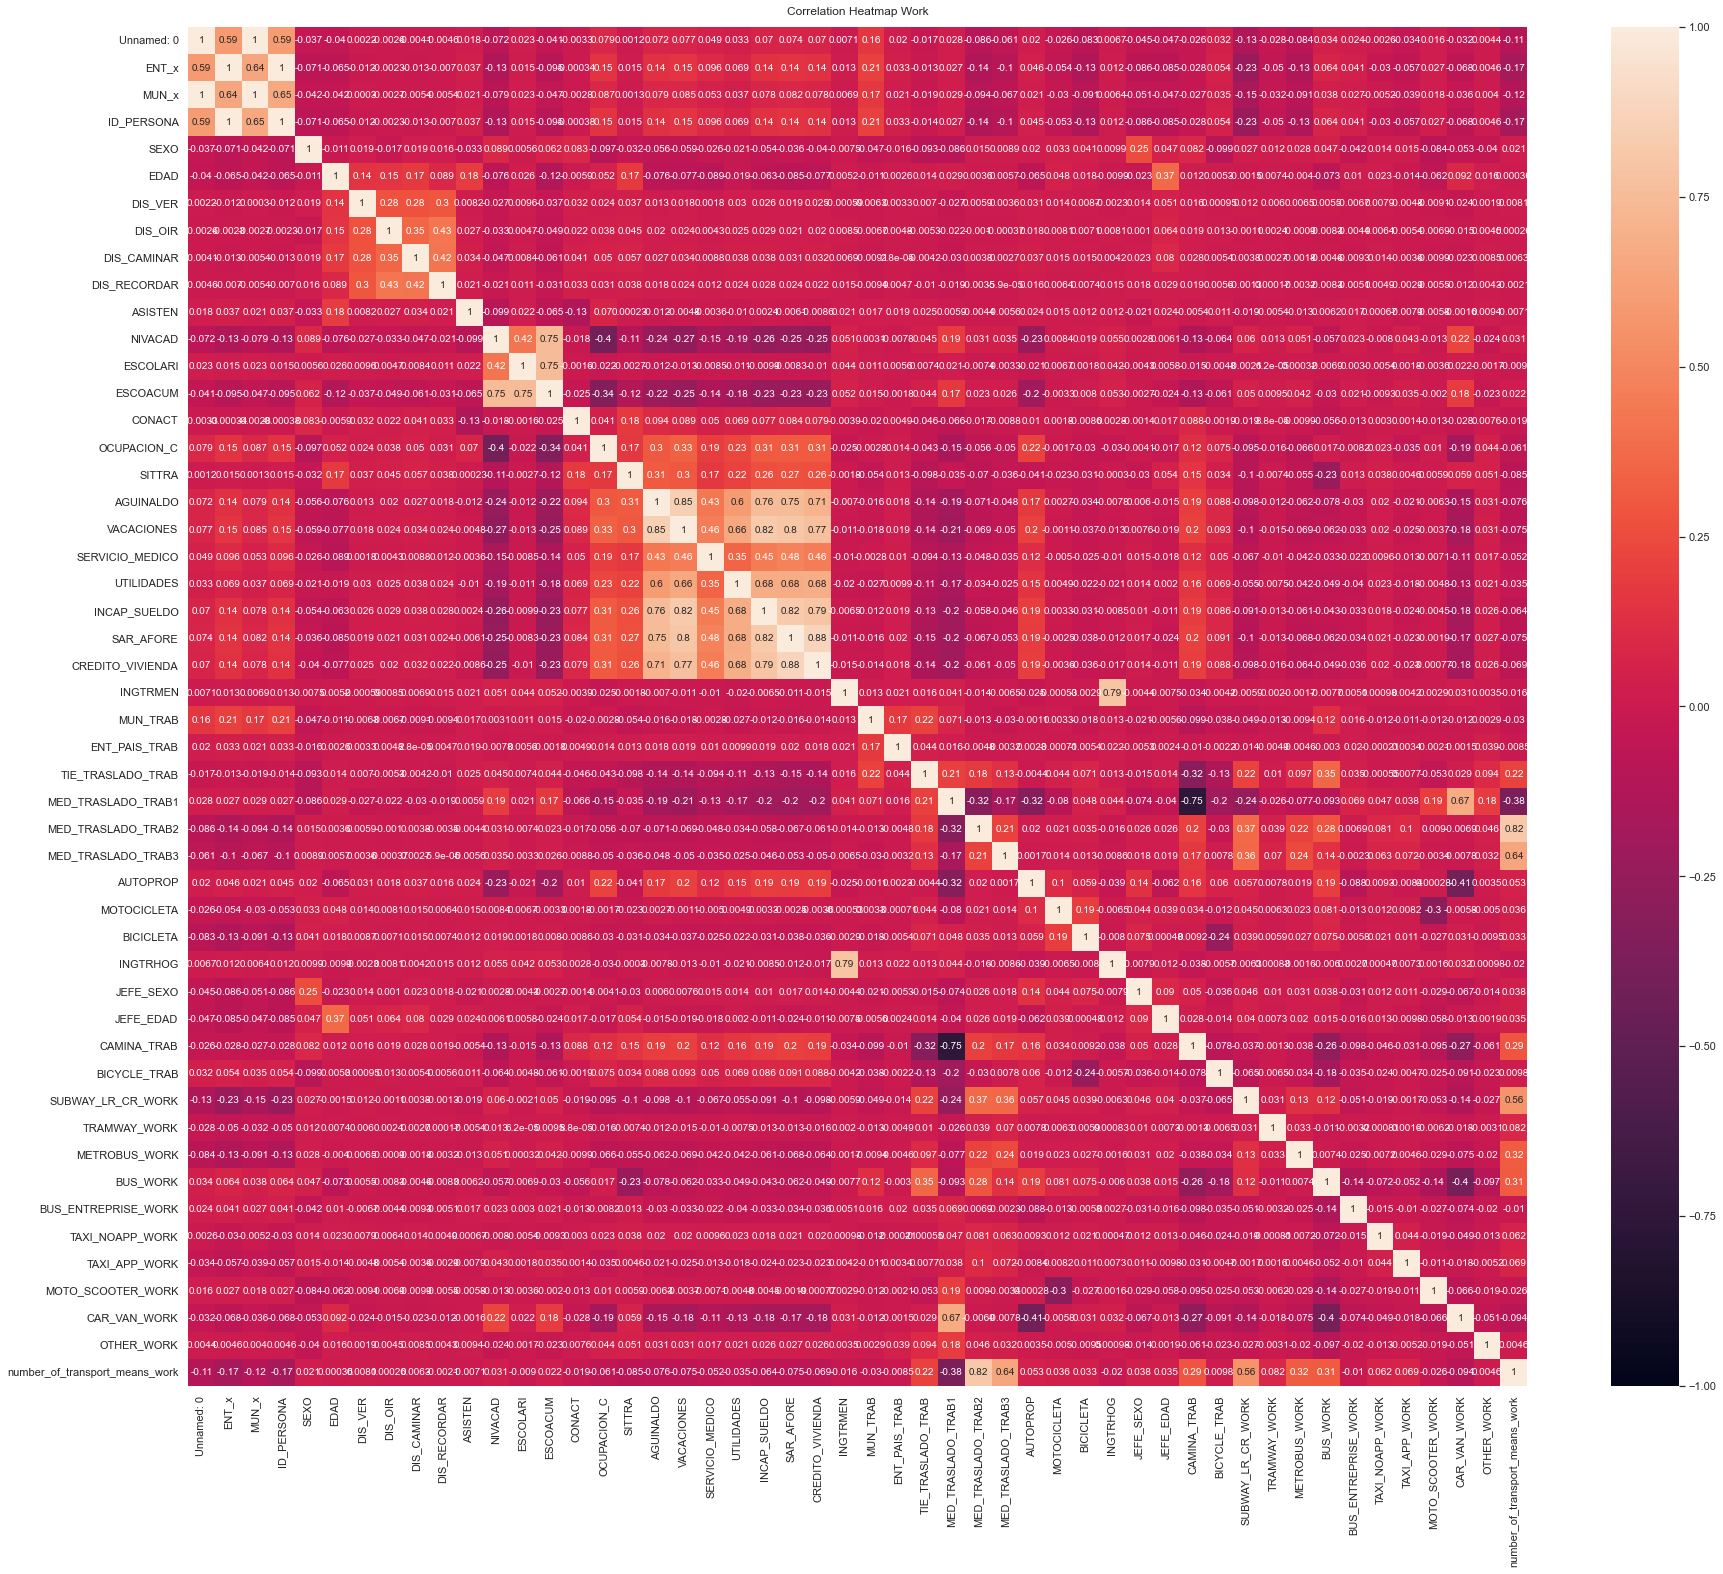

In [144]:
# Increase the size of the heatmap.
plt.figure(figsize=(30, 25))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(zmvm_work2.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap Work', fontdict={'fontsize':12}, pad=12);